## Практика 2

In [589]:
# Импортируем библиотеки

import numpy as np
import pandas as pd
import seaborn as sns
sns.set_palette('husl')
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

from imblearn.over_sampling import RandomOverSampler, SMOTE
from imblearn.under_sampling import RandomUnderSampler
from collections import Counter

In [590]:
# Присвоим переменной «url» ссылку на датасет:

df = pd.read_csv('D:/Git/ml_data.mining/data/Churn_Modelling.csv')


## Анализ данных 

In [591]:
df.shape

(10002, 14)

In [592]:
df.head(10)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42.0,2,0.00,1,1.0,1.0,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41.0,1,83807.86,1,0.0,1.0,112542.58,0
2,3,15619304,Onio,502,France,Female,42.0,8,159660.80,3,1.0,0.0,113931.57,1
3,4,15701354,Boni,699,France,Female,39.0,1,0.00,2,0.0,0.0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43.0,2,125510.82,1,NaN,1.0,79084.10,0
5,6,15574012,Chu,645,Spain,Male,44.0,8,113755.78,2,1.0,0.0,149756.71,1
6,7,15592531,Bartlett,822,NaN,Male,50.0,7,0.00,2,1.0,1.0,10062.80,0
7,8,15656148,Obinna,376,Germany,Female,29.0,4,115046.74,4,1.0,0.0,119346.88,1
8,9,15792365,He,501,France,Male,44.0,4,142051.07,2,0.0,NaN,74940.50,0
9,10,15592389,H?,684,France,Male,NaN,2,134603.88,1,1.0,1.0,71725.73,0


In [593]:
import mpl_toolkits.mplot3d  # noqa: F401


from sklearn import datasets
from sklearn.cluster import KMeans

In [594]:
# Метод Pandas info()  выводит очень много информации о наборе данных - количество записей,
# количество ненулевых значений в каждом столбце, тип данных в столбце

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10002 entries, 0 to 10001
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10002 non-null  int64  
 1   CustomerId       10002 non-null  int64  
 2   Surname          10002 non-null  object 
 3   CreditScore      10002 non-null  int64  
 4   Geography        10001 non-null  object 
 5   Gender           10002 non-null  object 
 6   Age              10001 non-null  float64
 7   Tenure           10002 non-null  int64  
 8   Balance          10002 non-null  float64
 9   NumOfProducts    10002 non-null  int64  
 10  HasCrCard        10001 non-null  float64
 11  IsActiveMember   10001 non-null  float64
 12  EstimatedSalary  10002 non-null  float64
 13  Exited           10002 non-null  int64  
dtypes: float64(5), int64(6), object(3)
memory usage: 1.1+ MB


Удаление ненужных столбцов

In [595]:
del df['Surname']
# del df['Geography']
del df['CustomerId']
del df['Gender']
del df['Balance']
del df['Tenure']
del df['EstimatedSalary']

In [596]:
# Pandas describe() используется для просмотра  основной статистической информации, таких как процентиль, среднее,
# стандартное отклонение и т.д. фрейма данных или ряда числовых значений:

df.describe()

,RowNumber,CreditScore,Age,NumOfProducts,HasCrCard,IsActiveMember,Exited
count,10002.000000,10002.000000,10001.000000,10002.000000,10001.000000,10001.000000,10002.000000
mean,5001.499600,650.555089,38.922311,1.530194,0.705529,0.514949,0.203759
std,2887.472338,96.661615,10.487200,0.581639,0.455827,0.499801,0.402812
min,1.000000,350.000000,18.000000,1.000000,0.000000,0.000000,0.000000
25%,2501.250000,584.000000,32.000000,1.000000,0.000000,0.000000,0.000000
50%,5001.500000,652.000000,37.000000,1.000000,1.000000,1.000000,0.000000
75%,7501.750000,718.000000,44.000000,2.000000,1.000000,1.000000,0.000000
max,10000.000000,850.000000,92.000000,4.000000,1.000000,1.000000,1.000000


In [597]:
df['Exited'].value_counts()

Exited
0    7964
1    2038
Name: count, dtype: int64

In [598]:
df_counts = df['Exited'].value_counts()

In [599]:
for_del = df_counts.loc[0] - df_counts.loc[1]

In [600]:
for_del

np.int64(5926)

In [601]:
indexq = df[df['Exited']==0][:for_del].index

In [602]:
df1 = df.drop(indexq)

In [603]:
df1['Exited'].value_counts()

Exited
1    2038
0    2038
Name: count, dtype: int64

Сделал баланс классов, для лучшей реализации

In [604]:
df1.isnull().sum()

RowNumber         0
CreditScore       0
Geography         0
Age               0
NumOfProducts     0
HasCrCard         0
IsActiveMember    0
Exited            0
dtype: int64

In [605]:
df1['Exited'].unique()

array([1, 0])

In [606]:
df1.HasCrCard = df.HasCrCard.fillna(df.HasCrCard.min())
df1.HasCrCard.describe()

count    4076.000000
mean        0.707066
std         0.455164
min         0.000000
25%         0.000000
50%         1.000000
75%         1.000000
max         1.000000
Name: HasCrCard, dtype: float64

In [607]:
df1.Age = df.Age.fillna(df.Age.median())
df1.IsActiveMember = df.IsActiveMember.fillna(df.IsActiveMember.median())

In [608]:
df1.Geography.fillna('France', inplace=True)

C:\Users\kanze\AppData\Local\Temp\ipykernel_15832\125085142.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df1.Geography.fillna('France', inplace=True)


Нормализация

In [609]:
from sklearn.preprocessing import MinMaxScaler  # StandardScaler

scaler_mm = MinMaxScaler()

df1[['mmAge', 'mmCreditScore']] = scaler_mm.fit_transform(df1[['Age', 'CreditScore']])
df1.head()

,RowNumber,CreditScore,Geography,Age,NumOfProducts,HasCrCard,IsActiveMember,Exited,mmAge,mmCreditScore
0,1,619,France,42.0,1,1.0,1.0,1,0.363636,0.538
2,3,502,France,42.0,3,1.0,0.0,1,0.363636,0.304
5,6,645,Spain,44.0,2,1.0,0.0,1,0.393939,0.590
7,8,376,Germany,29.0,4,1.0,0.0,1,0.166667,0.052
16,17,653,Germany,58.0,1,1.0,0.0,1,0.606061,0.606


In [610]:
del df1['Age']
del df1['CreditScore']

## Визуализация данных 

In [611]:
# # Преобразование столбца HasCrCard
# df['Exited'] = df['Exited'].map({0: 'No', 1: 'Yes'})

In [612]:
df1.head()

,RowNumber,Geography,NumOfProducts,HasCrCard,IsActiveMember,Exited,mmAge,mmCreditScore
0,1,France,1,1.0,1.0,1,0.363636,0.538
2,3,France,3,1.0,0.0,1,0.363636,0.304
5,6,Spain,2,1.0,0.0,1,0.393939,0.590
7,8,Germany,4,1.0,0.0,1,0.166667,0.052
16,17,Germany,1,1.0,0.0,1,0.606061,0.606


In [613]:
from sklearn.preprocessing import OrdinalEncoder
enc = OrdinalEncoder()
df1[['Geography']] = enc.fit_transform(df1[['Geography']])
df1.head()

,RowNumber,Geography,NumOfProducts,HasCrCard,IsActiveMember,Exited,mmAge,mmCreditScore
0,1,0.0,1,1.0,1.0,1,0.363636,0.538
2,3,0.0,3,1.0,0.0,1,0.363636,0.304
5,6,2.0,2,1.0,0.0,1,0.393939,0.590
7,8,1.0,4,1.0,0.0,1,0.166667,0.052
16,17,1.0,1,1.0,0.0,1,0.606061,0.606


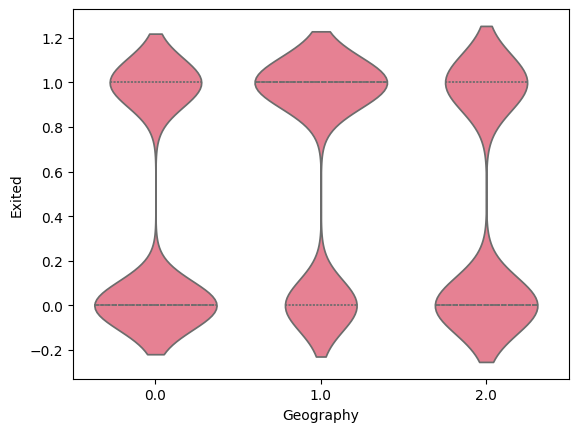

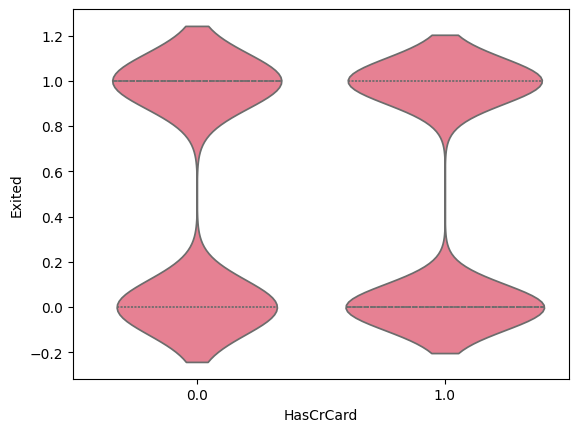

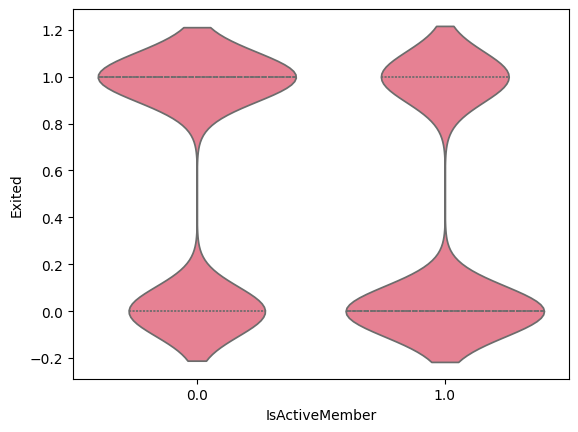

In [614]:
# Скрипичный график.
# Используется для проверки сравнения распределения переменных:

sns.violinplot(y='Exited', x='Geography', data=df1, inner='quartile')
plt.show()
sns.violinplot(y='Exited', x='HasCrCard', data=df1, inner='quartile')
plt.show()
sns.violinplot(y='Exited', x='IsActiveMember', data=df1, inner='quartile')
plt.show()
# sns.violinplot(y='HasCrCard', x='Gender', data=df, inner='quartile')
# plt.show()
# sns.violinplot(y='HasCrCard', x='Geography', data=df, inner='quartile')
# plt.show()


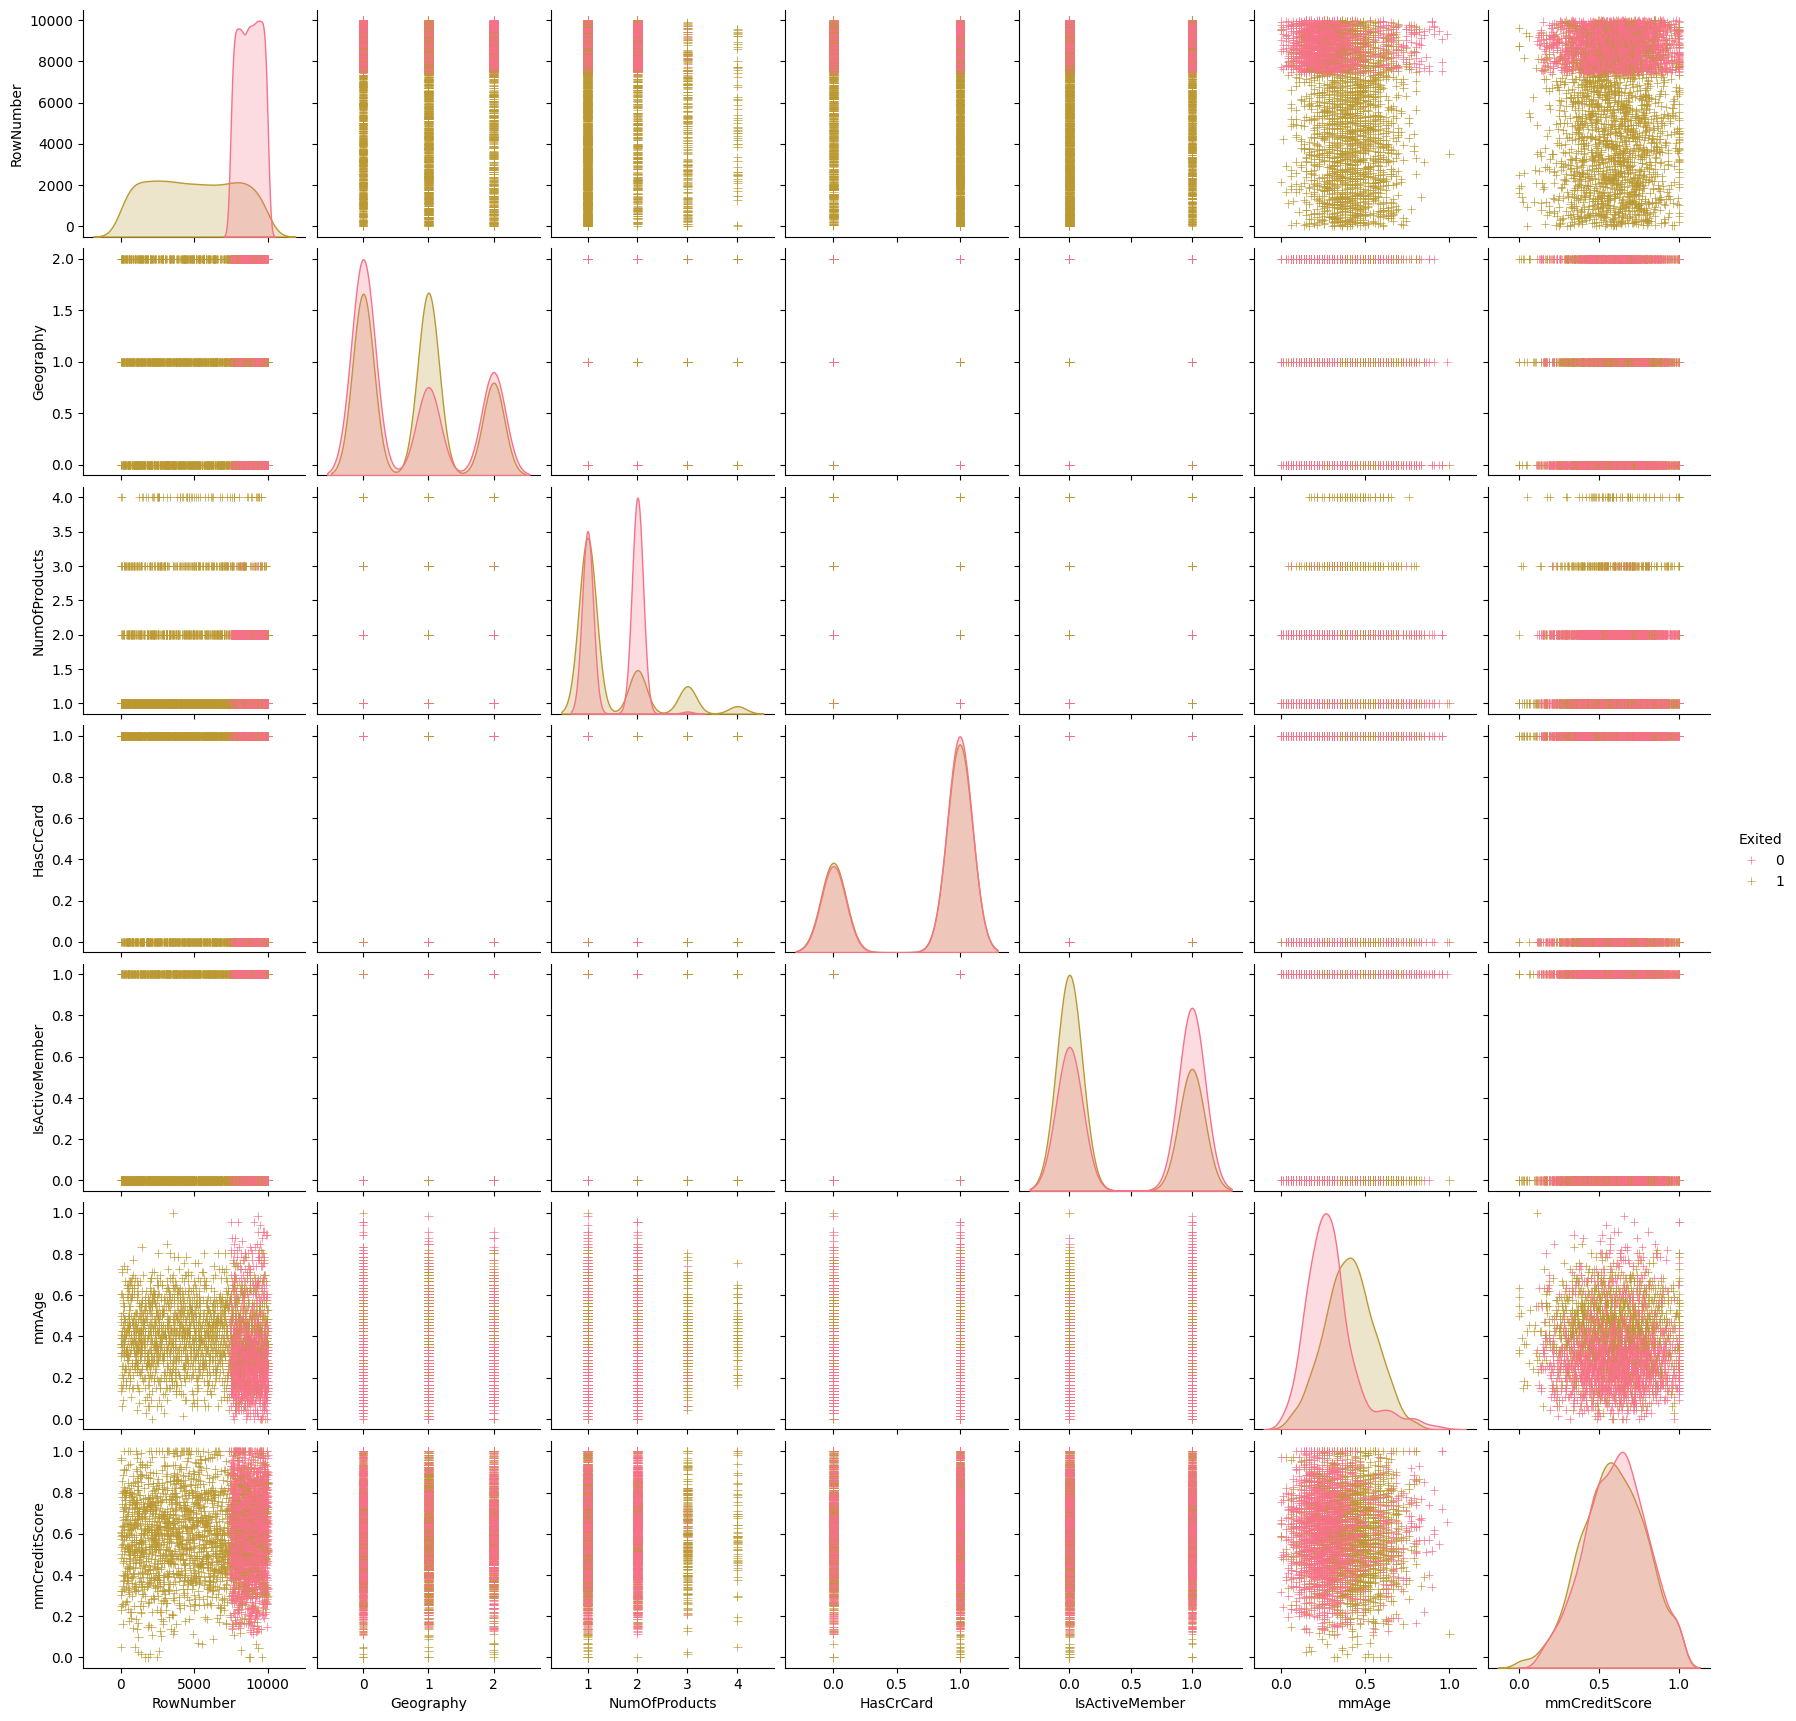

In [615]:
# Парный график
#Построение нескольких попарных двумерных распределений в наборе данных с помощью pairplot:

sns.pairplot(df1, hue='Exited', markers='+')
plt.show()

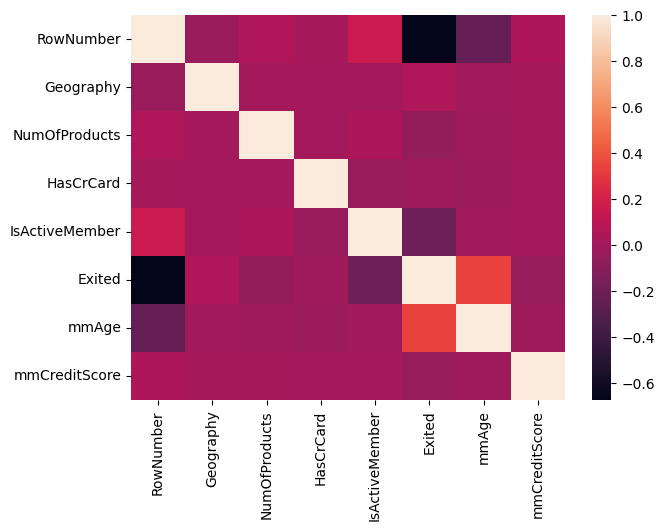

In [616]:
# Тепловая карта
# Построение тепловой карты для проверки корреляции.
# dataset.corr() используется для поиска попарной корреляции всех столбцов в кадре данных.

plt.figure(figsize=(7,5))
sns.heatmap(df1.corr(numeric_only = True))
plt.show()

# Построение модели

## Разделение набора данных

Y  - целевая переменная, которую предсказываем. Мы ищем зависимость этой переменной от соответствующих фич.  В нашем случае это столбец class.

В X складываем весь набор данных без целевой переменной.

In [617]:
X = df1.drop('Exited', axis=1)
y = df1['Exited']
print(f'X shape: {X.shape} | y shape: {y.shape} ')

X shape: (4076, 7) | y shape: (4076,) 


## Train Test разделение

Разделяем наш набор данных на обучающий (train) и тестовый (test) с помощью train_test_split(), мы берем 80% данных для обучения нашей модели и 20% оставляем в качестве проверочного набора данных:

Баланссировка данных

In [618]:
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

In [619]:
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.3, random_state=42)

## Обучение и выбор оптимальной модели

Далее попробуем следующие алгоритмы:

Logistic Regression (LR) </br>
Linear Discriminant Analysis (LDA)</br>
K-Nearest Neighbors (KNN)</br>
Classification and Regression Trees (CART)</br>
Gaussian Naive Bayes (NB)</br>
Support Vector Machines (SVM)</br>
[Справочная информация по классификаторам](https://colab.research.google.com/drive/12aLAEAtM5a3dWh-6UYj18ONeCuH_lGJ3?usp=sharing)

In [620]:
# создаем лист для тех моделей, которые будем изучать
models = []
models.append(('LR', LogisticRegression(solver='lbfgs', max_iter=1000)))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVC', SVC(gamma='auto')))

# оцениваем их метрики
results = []
model_names = []
for name, model in models:
  kfold = StratifiedKFold(n_splits=11, random_state=1, shuffle=True)
  cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring='accuracy')
  # print(cv_results)
  results.append(cv_results)
  model_names.append(name)
  print('%s: %f (%f)' % (name, cv_results.mean(), cv_results.std()))

c:\Users\kanze\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LR: 0.860855 (0.021176)
LDA: 0.851389 (0.022126)
KNN: 0.850335 (0.017226)
CART: 0.845781 (0.016479)
NB: 0.876972 (0.014292)
SVC: 0.790748 (0.021998)


LinearDiscriminantAnalysis и Наивный Байесовский классификатор показали лучшие метрики среди всех алгоритмов.
Далее работаем с LinearDiscriminantAnalysis.

Давайте обучим модель LDA на нашем обучающем наборе и сделаем прогноз на тестовом наборе на следующем шаге.

## Обучение конкретной модели
Определяем нашу модель LDA
После этого подгоняем/обучаем модель на X_train и Y_train с помощью метода .fit().
Затем мы делаем прогноз на X_test с помощью метода .predict().

In [621]:
df1['Exited'].value_counts()

Exited
1    2038
0    2038
Name: count, dtype: int64

svd для большей точности

In [622]:
sk_lda = LinearDiscriminantAnalysis(solver='svd')
sk_lda.fit(X_train, y_train)
sk_lda_pred_res = sk_lda.predict(X_test)
sk_transformed = sk_lda.transform(X_train)
sk_lda_accuracy = accuracy_score(y_test, sk_lda_pred_res)

print(f'sk LDA accuracy: {sk_lda_accuracy}')
print(f'sk LDA prediction: {sk_lda_pred_res}')
print('sk transformed features', sk_transformed[:3].T, sep='\n')

sk LDA accuracy: 0.8560915780866721
sk LDA prediction: [0 0 1 ... 1 1 0]
sk transformed features
[[-0.54632456 -0.94430249  2.40607022]]


## Визуализация решения

<Axes: title={'center': 'LDA surface with original features'}>

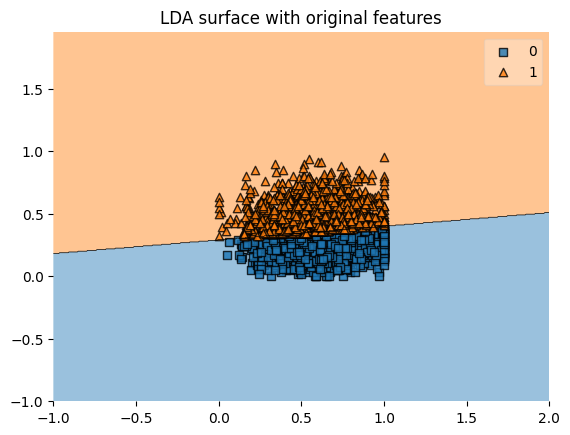

In [623]:
from mlxtend.plotting import plot_decision_regions

# Создадим целевой вектор y_2d
# Преобразуем классы к классам 0, 1, 2 соответственно
#y_s = y_train.map({'Iris-setosa': 0, 'Iris-versicolor': 1, 'Iris-virginica': 2})
sk_lda = LinearDiscriminantAnalysis(solver='svd')
sk_lda.fit(X_train, y_train)
sk_lda_pred_res = sk_lda.predict(X_test)
sk_transformed = sk_lda.transform(X_train)
sk_lda_accuracy = accuracy_score(y_test, sk_lda_pred_res)

y_s = y_train
X_2d= X_train[['mmCreditScore',	'mmAge']].values

y_2d = y_s.values

sk_lda1 = LinearDiscriminantAnalysis(solver='eigen')
sk_lda1.fit(X_2d, y_2d)
sk_lda_pred_res = sk_lda1.predict(X_2d)

plt.title('LDA surface with original features')
plot_decision_regions(
    	X=X_2d,
    	y=sk_lda_pred_res,
    	clf=sk_lda1)

<Axes: title={'center': 'LDA surface with transformed features'}>

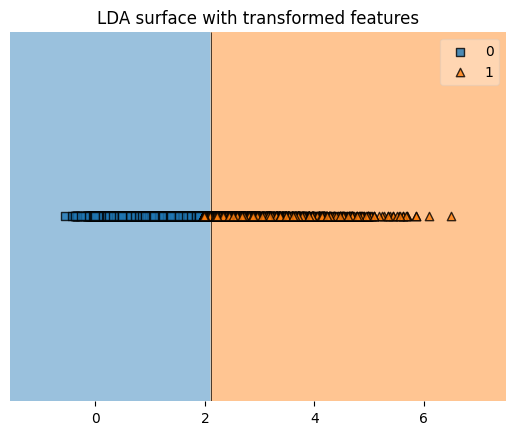

In [624]:
# data = df["HasCrCard"].map({'No': 0, 'Yes': 1})
sk_lda = LinearDiscriminantAnalysis(solver='svd')
sk_lda.fit(X_train, y_train)
sk_lda_pred_res = sk_lda.predict(X_test)
sk_transformed = sk_lda.transform(X_train)
sk_lda_accuracy = accuracy_score(y_test, sk_lda_pred_res)


Xs = df1[['mmCreditScore',	'mmAge']]
ys = df1['Exited'].values

sk_lda2 = LinearDiscriminantAnalysis(solver='eigen')
X1_lda = sk_lda2.fit(Xs, ys)
sk_lda_pred_res2 = sk_lda2.predict(Xs)
sk_transformed2 = sk_lda2.transform(Xs)
# Xs = X1_lda

X1_lda_train, X1_lda_test, y1_train, y1_test = train_test_split(sk_transformed2, sk_lda_pred_res2, random_state=0)

sk_lda2.fit(X1_lda_train, y1_train)

plt.title('LDA surface with transformed features')
plot_decision_regions(sk_transformed2, sk_lda_pred_res2, clf=sk_lda2)

In [627]:
predicted = sk_lda.predict(X_test)

In [629]:
from sklearn import model_selection, preprocessing, feature_selection, ensemble, linear_model, metrics, decomposition

## Accuray e AUC
'''
Теперь смотрим метрики.
НА ТЕСТОВОМ ДАТАСЕТЕ
'''
accuracy = metrics.accuracy_score(y_test, predicted)#Оценим точность классификации.

'''
Получим результат
'''

## Precision e Recall
recall = metrics.recall_score(y_test, predicted, average="weighted")
precision = metrics.precision_score(y_test, predicted, average="weighted")
print("Recall (all 1s predicted right):", round(recall,2))
print("Precision (confidence when predicting a 1):", round(precision,2))
print("Detail:")
print(metrics.classification_report(y_test, predicted, target_names=[str(i) for i in np.unique(y_test)]))

Recall (all 1s predicted right): 0.86
Precision (confidence when predicting a 1): 0.87
Detail:
              precision    recall  f1-score   support

           0       0.79      0.96      0.87       603
           1       0.95      0.76      0.84       620

    accuracy                           0.86      1223
   macro avg       0.87      0.86      0.85      1223
weighted avg       0.87      0.86      0.85      1223

